<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/Exercise_6_Muklis_Pramaditya%20Ardian%20Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breakout Room Study Case
Panggil kembali data **loan_prediction.csv**. Sebelumnya anda telah melakukan analisis pendapatan nasabah. Anda berfikir bahwa anda memerlukan informasi tambahan. Anda telah menyiapkan beberapa pertanyaan mengenai riset anda nantinya. List pertanyaan tersebut seperti berikut :
1. Berapa rata-rata dan standar deviasi dari coapplicantincome?
2. Anda berasumsi bahwa kemungkinan besar coapplicantincome pasti tidak kurang dari 1000. Apakah asumsi anda benar?
3. Berapakah rata-rata coapplicantincome berdasarkan loan_status ?
4. Kira-kira pada kisaran berapakah coapplicantincome untuk Graduated?
5. Kamu ingin mengetahui apakah Education akan mempengaruhi coapplicantincome?


## Load Data

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SIB/2. Statistics for Data Science/2.3/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Pertanyaan 1
Mencari rata-rata dan standar deviasi dari coapplicantincome.

In [ ]:
print('rata-rata dan stdev dari coapplicantincome = ')
print('')
#rata - rata
mean_coap = df['CoapplicantIncome'].mean()
print('rata-rata coapplicantincome adalah ',mean_coap)
#stdev
std_coap = df['CoapplicantIncome'].std()
print('stdev coapplicantincome adalah ',std_coap)

rata-rata dan stdev dari coapplicantincome = 

rata-rata coapplicantincome adalah  1621.2457980271008
stdev coapplicantincome adalah  2926.2483692241885


## Pertanyaan 2
Uji hipotesis dengan asumsi bahwa coapplicantincome pasti tidak kurang dari 1000

**Hypothesis:** <br>
 Null Hypothesis: μ <= 1000 <br>
 Alternative Hypothesis: μ > 1000

In [ ]:
print('H0 = μ <= 1000')
print('Halt = μ > 1000')
print('')
print('uji hipotesis dengan asumsi bahwa coapplicantincome pasti tidak kurang dari 1000','\n')

#Uji Hipotesis
#menggunakan statistics test z-test, karena data > 30
alpa = 0.05 #tingkat nilai signifikan 0.05 karena mengambil hipotesis 95%
tset, pval = stats.ttest_1samp(df['CoapplicantIncome'],1000)
print('tset = ', tset)
print('p-values = ', pval)

if pval < alpa:
  print('tolak H0, coapplicantincome lebih dari 0.05')
else:
  print('gagal tolak H0, coapplicantincome tidak lebih dari 0.05')

H0 = μ <= 1000
Halt = μ > 1000

uji hipotesis dengan asumsi bahwa coapplicantincome pasti tidak kurang dari 1000 

tset =  5.2606143484331485
p-values =  1.9871354383283204e-07
tolak H0, coapplicantincome lebih dari 0.05


## Pertanyaan 3
Mencari rata-rata coapplicantincome berdasarkan loan_status

In [ ]:
print('rata-rata coapplicantincome dari loan status = ')
print('')
#rata - rata
df.groupby('Loan_Status')['CoapplicantIncome'].mean()

rata-rata coapplicantincome dari loan status = 



Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64

## Pertanyaan 4
Mencari kisaran coapplicantincome untuk Graduated

In [ ]:
#jumlah graduate dari kolom education
sum(df['Education'] == 'Graduate')

480

In [ ]:
print('kisaran coapplicantincome untuk graduated = ','\n')
#berapakah 95% confidence interval dari coapplicantincome untuk graduated?
#mendapatkan stdev
stdev = df[df['Education'] == 'Graduate']['CoapplicantIncome'].std()
print('standart deviation adalah ',str(stdev))

#ukuran sampel graduate
n = np.sqrt(480)
print('ukuran dari sampel adalah ',str(n))

#margin error
e = 1.96*(stdev/n)
print('margin error coapplicantincome untuk graduated adalah ',str(e))

#confidence interval
print('CI 95% dari coapplicantincome untuk graduated adalah',str(mean_coap-e), 'dan', str(mean_coap+e))

kisaran coapplicantincome untuk graduated =  

standart deviation adalah  3230.9658502821926
ukuran dari sampel adalah  21.908902300206645
margin error coapplicantincome untuk graduated adalah  289.04657019230797
CI 95% dari coapplicantincome untuk graduated adalah 1332.199227834793 dan 1910.2923682194087


## Pertanyaan 5
Uji Hipotesis untuk pengaruh Education terhadap coapplicantincome

In [ ]:
#mencari rata-rata coapplicantincome berdasarkan Education
df.groupby('Education')['CoapplicantIncome'].mean()

Education
Graduate        1717.474833
Not Graduate    1276.544776
Name: CoapplicantIncome, dtype: float64

In [ ]:
#mendapatkan list dari unique item didalam Education
inc_cond = list(df['Education'].unique())
inc_cond

['Graduate', 'Not Graduate']

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

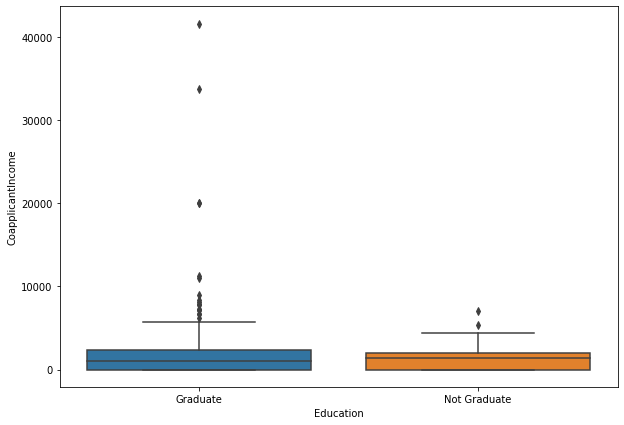

In [ ]:
#visualisasi persebaran data di kolom Education dengan boxplot
plt.figure(figsize=(10,7))
sns.boxplot(x='Education', y='CoapplicantIncome', data = df)

- gambar biru (Graduate) = terdapat 3 garis(atas, tengah, bawah)
garis bawah = quartil 1
garis tengah = quartil 2 (median)
garis atas = quartil 3
- gambar oranye (Not Graduate) = sama seperti gambar biru, tetapi median lebih tinggi daripada gambar biru, sehingga mean lebih besar. hal ini disebabkan karena gambar graduate terdapat outlier

**Hipotesis CoapplicantIncome**<br>
Hipotesis Null : $\mu_1-\mu_2=0$, CoapplicantIncome dengan Education Graduate sama dengan Not Graduate<br>
Hipotesis Alternative : $\mu_1 - \mu_2 != 0$, CoapplicantIncome dengan Education Graduate tidak sama dengan Not Graduate<br>

In [ ]:
# Mencari perbedaan pendapatan antara tiap item dalam Education
list_data= range(2)
alpha=0.05

for i in list_data:
    for j in list_data[i+1:]:
            group1 = df[df['Education']==inc_cond[i]]["CoapplicantIncome"]
            group2 = df[df['Education']==inc_cond[j]]["CoapplicantIncome"]
            stat, p = ttest_ind(group1, group2)
            # print(group1, group2)
            print('=======================================================================')
            print('Hipotesis dari ' + str(inc_cond[i] + ' dan ' + str(inc_cond[j])))
            print('t=%.3f, p=%.3f' % (stat, p))

            # interpret via p-value
            if p < alpha:
	            print('Tolak H0, maka harga Education {} tidak sama dengan {}.'.format(inc_cond[i], inc_cond[j]))
            else:
	            print('Gagal Tolak H0, maka harga Education {} sama dengan {}.'.format(inc_cond[i], inc_cond[j]))

Hipotesis dari Graduate dan Not Graduate
t=1.544, p=0.123
Gagal Tolak H0, maka harga Education Graduate sama dengan Not Graduate.
